# Data preparation

Very useful details on required domain knowledge [here](https://www.kaggle.com/competitions/playground-series-s3e17/discussion/416765)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

random_state = 69420
np.random.seed(random_state)

test_size = 0.2

pd.set_option("display.precision", 4)

In [17]:
import os.path
from IPython.display import display, Image

def pairplot_or_image(data, img_path, target, overwrite=False, diag_kind="auto"):
    if os.path.isfile(img_path) and not overwrite:
        display(Image(filename=img_path))
    else:
        pplot = sns.pairplot(data, hue=target, diag_kind=diag_kind)
        pplot.figure.savefig(img_path)

In [18]:
data = pd.read_csv("data/train.csv")
data.set_index("id", inplace=True)

print(f"Total size: {len(data)}")

Total size: 136429


The target class is the "Machine failure" attribute

In [19]:
target = "Machine failure"

data[target] = data[target].astype("category")

In [20]:
data[target].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

The "Product ID" attribute is irrelevant for this project

In [21]:
data.drop(columns=["Product ID"], inplace=True)

Converting the "type" attribute from categorical to numerical

In [22]:
"""data["Type"] = data["Type"].astype("category")
data["Type"] = data["Type"].cat.codes"""

data.drop(columns=["Type"], axis=1, inplace=True)

This dataset was artificially generated [from another one](https://www.kaggle.com/datasets/dineshmanikanta/machine-failure-predictions/data), so there are (very) few inconsistencies. Namely, the TWF,HDF,PWF,OSF and RNF columns indicate the type of failure (see [here](https://www.kaggle.com/competitions/playground-series-s3e17/discussion/416765)) but we can find a small number of rows that have failure indicators set to 1 (i.e., the machine failed) but the class attribute set to 0 (i.e., the machine didn't fail)

These inconsistent rows, and later the failure type attributes, have to be removed

In [23]:
# Find rows with target==0 and TWF or HDF or PWF or OSF or RNF == 1
# These rows are not valid
invalid = data[(data[target] == 0) & (data["TWF"] == 1)].index
invalid = invalid.append(data[(data[target] == 0) & (data["HDF"] == 1)].index)
invalid = invalid.append(data[(data[target] == 0) & (data["PWF"] == 1)].index)
invalid = invalid.append(data[(data[target] == 0) & (data["OSF"] == 1)].index)
invalid = invalid.append(data[(data[target] == 0) & (data["RNF"] == 1)].index)

print(f"Invalid {len(invalid)}")
# Remove them
data.drop(invalid, inplace=True)

# Remove TWF, HDF, PWF, OSF, RNF columns
data.drop(columns=["TWF", "HDF", "PWF", "OSF", "RNF"], inplace=True)

Invalid 315


In [24]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,136114.0000,136114.0000,136114.0000,136114.0000,136114.0000
mean,299.8623,309.9408,1520.3419,40.3448,104.4143
std,1.8622,1.3851,138.5953,8.4968,63.9645
min,295.3000,305.8000,1181.0000,3.8000,0.0000
25%,298.3000,308.7000,1432.0000,34.6000,48.0000
50%,300.0000,310.0000,1493.0000,40.4000,106.0000
75%,301.2000,310.9000,1580.0000,46.1000,159.0000
max,304.4000,313.8000,2886.0000,76.6000,253.0000


In [25]:
for col in [c for c in data.columns if c != target]:
    # normalize column
    data[col] = (data[col] - data[col].mean()) / data[col].std()
    #data[col] = data[col] / data[col].max()

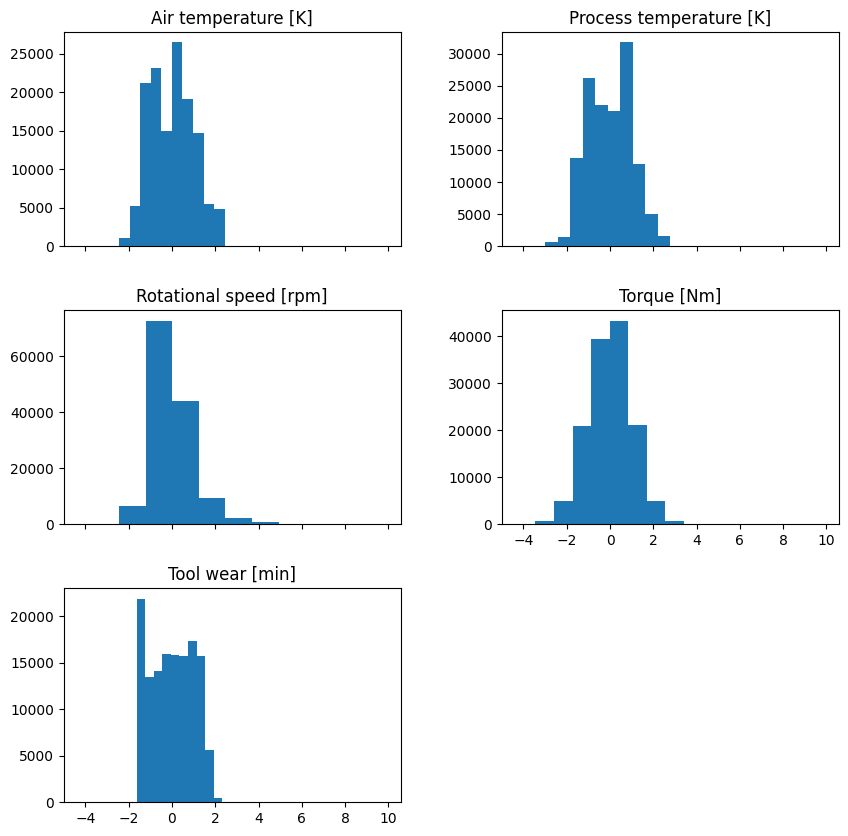

In [26]:
data.hist(grid=False, sharex=True, figsize=(10, 10));

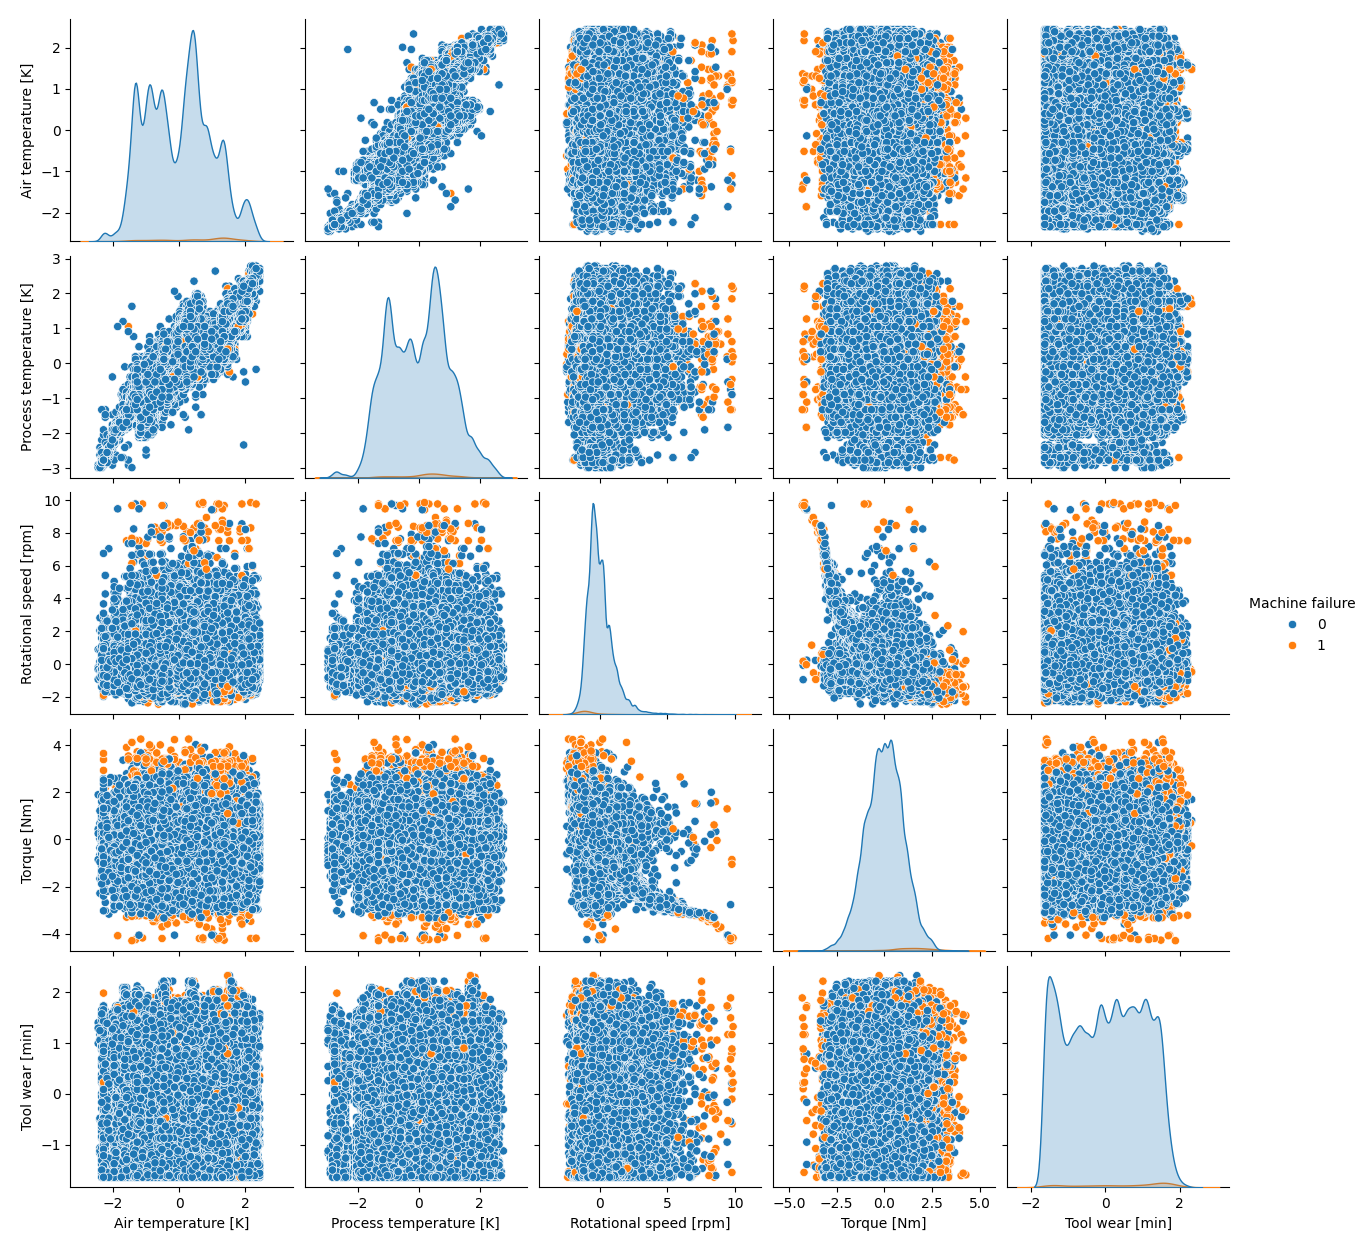

In [27]:
pairplot_or_image(data, "pairplot.png", target, overwrite=False)

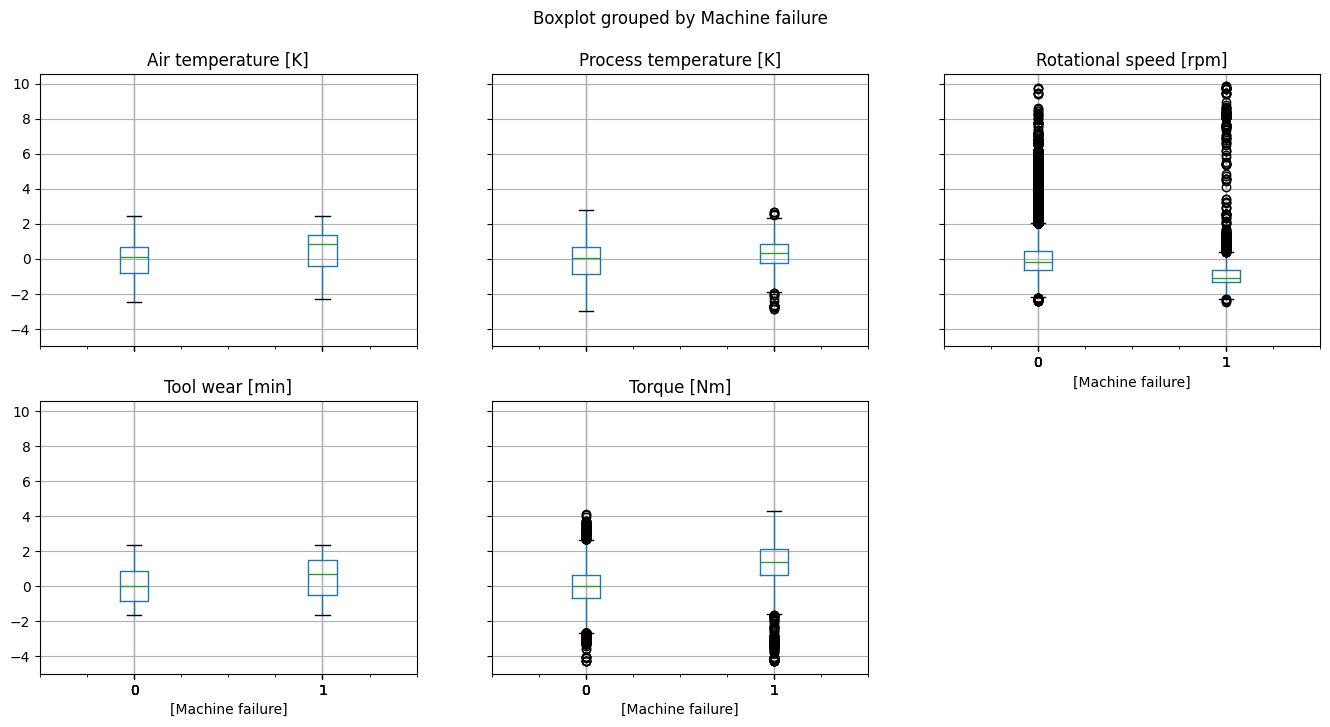

In [28]:
data.boxplot(figsize=(16, 8), by=target, layout=(2, 3));

In [29]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,1.3611e+05,1.3611e+05,1.3611e+05,1.3611e+05,1.3611e+05
mean,4.3298e-14,-9.3051e-15,-6.6443e-16,1.2212e-15,-9.8035e-17
std,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00
min,-2.4500e+00,-2.9894e+00,-2.4484e+00,-4.3010e+00,-1.6324e+00
25%,-8.3897e-01,-8.9579e-01,-6.3741e-01,-6.7612e-01,-8.8196e-01
50%,7.3941e-02,4.2749e-02,-1.9728e-01,6.4944e-03,2.4791e-02
75%,7.1835e-01,6.9251e-01,4.3045e-01,6.7734e-01,8.5337e-01
max,2.4368e+00,2.7862e+00,9.8536e+00,4.2669e+00,2.3229e+00


In [31]:
data.to_csv("data/train_processed.csv")